In [18]:
import pandas as pd
df = pd.read_csv("ASA All PGA Raw Data - Tourn Level.csv")
df.head()

,Player_initial_last,tournament id,player id,hole_par,strokes,hole_DKP,hole_FDP,hole_SDP,streak_DKP,streak_FDP,streak_SDP,n_rounds,made_cut,pos,finish_DKP,finish_FDP,finish_SDP,total_DKP,total_FDP,total_SDP,player,Unnamed: 2,Unnamed: 3,Unnamed: 4,tournament name,course,date,purse,season,no_cut,Finish,sg_putt,sg_arg,sg_app,sg_ott,sg_t2g,sg_total
0,A. Ancer,401353224,9261,288,289,60.0,51.1,56,3,7.6,3,4,1,32.0,2,1,0,65.0,59.7,59,Abraham Ancer,NaN,NaN,NaN,The Memorial Tournament pres. by Nationwide,"Muirfield Village Golf Club - Dublin, OH",2022-06-05,12.0,2022,0,T32,0.20,-0.13,-0.08,0.86,0.65,0.85
1,A. Hadwin,401353224,5548,288,286,72.5,61.5,61,8,13.0,3,4,1,18.0,5,4,2,85.5,78.5,66,Adam Hadwin,NaN,NaN,NaN,The Memorial Tournament pres. by Nationwide,"Muirfield Village Golf Club - Dublin, OH",2022-06-05,12.0,2022,0,T18,0.36,0.75,0.31,0.18,1.24,1.60
2,A. Lahiri,401353224,4989,144,147,21.5,17.4,27,0,0.0,0,2,0,NaN,0,0,0,21.5,17.4,27,Anirban Lahiri,NaN,NaN,NaN,The Memorial Tournament pres. by Nationwide,"Muirfield Village Golf Club - Dublin, OH",2022-06-05,12.0,2022,0,CUT,-0.56,0.74,-1.09,0.37,0.02,-0.54
3,A. Long,401353224,6015,144,151,20.5,13.6,17,0,0.4,0,2,0,NaN,0,0,0,20.5,14.0,17,Adam Long,NaN,NaN,NaN,The Memorial Tournament pres. by Nationwide,"Muirfield Village Golf Club - Dublin, OH",2022-06-05,12.0,2022,0,CUT,-1.46,-1.86,-0.02,0.80,-1.08,-2.54
4,A. Noren,401353224,3832,144,148,23.5,18.1,23,0,1.2,0,2,0,NaN,0,0,0,23.5,19.3,23,Alexander Noren,NaN,NaN,NaN,The Memorial Tournament pres. by Nationwide,"Muirfield Village Golf Club - Dublin, OH",2022-06-05,12.0,2022,0,CUT,0.53,-0.36,-1.39,0.19,-1.56,-1.04


In [22]:
cat_col = "Player_initial_last"    
num_col1 = "tournament id"           
num_col2 = "player id"           

overall_stats = df[[num_col1, num_col2]].agg(['mean', 'max', 'min', 'std', 'median'])
overall_stats.loc['range'] = overall_stats.loc['max'] - overall_stats.loc['min']

categories = df[cat_col].unique()

category_stats = {}

categories = categories[:5]

for cat in categories:
    subset = df[df[cat_col] == cat][[num_col1, num_col2]]
    stats = subset.agg(['mean', 'max', 'min', 'std', 'median'])
    stats.loc['range'] = stats.loc['max'] - stats.loc['min']
    category_stats[cat] = stats

overall_stats, category_stats

(        tournament id     player id
 mean     2.331807e+08  7.979041e+04
 max      4.013669e+08  4.845309e+06
 min      2.230000e+03  5.000000e+00
 std      1.979221e+08  5.753816e+05
 median   4.010565e+08  3.793000e+03
 range    4.013646e+08  4.845304e+06,
 {'A. Ancer':         tournament id  player id
  mean     3.116770e+08     9261.0
  max      4.013669e+08     9261.0
  min      2.483000e+03     9261.0
  std      1.676547e+08        0.0
  median   4.010566e+08     9261.0
  range    4.013644e+08        0.0,
  'A. Hadwin':         tournament id  player id
  mean     2.123874e+08     5548.0
  max      4.013533e+08     5548.0
  min      2.231000e+03     5548.0
  std      2.007759e+08        0.0
  median   4.010253e+08     5548.0
  range    4.013510e+08        0.0,
  'A. Lahiri':         tournament id  player id
  mean     2.375381e+08     4989.0
  max      4.013533e+08     4989.0
  min      2.240000e+03     4989.0
  std      1.978045e+08        0.0
  median   4.010408e+08     4989.0


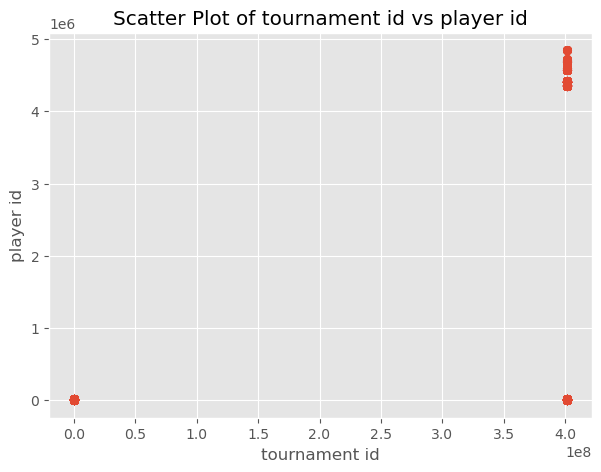

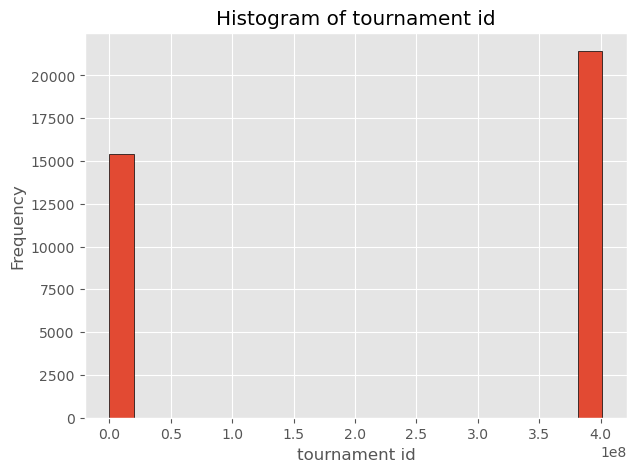

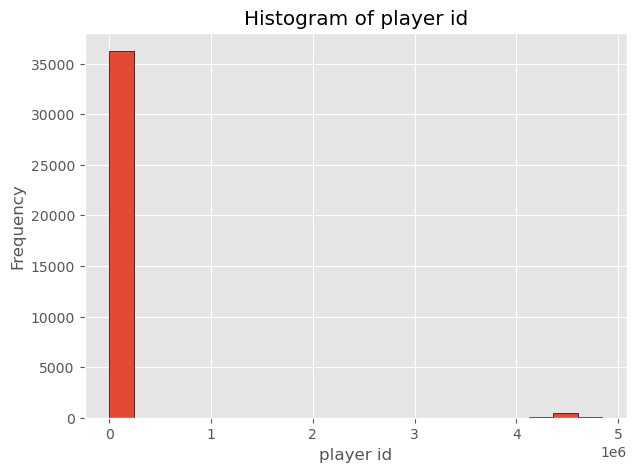

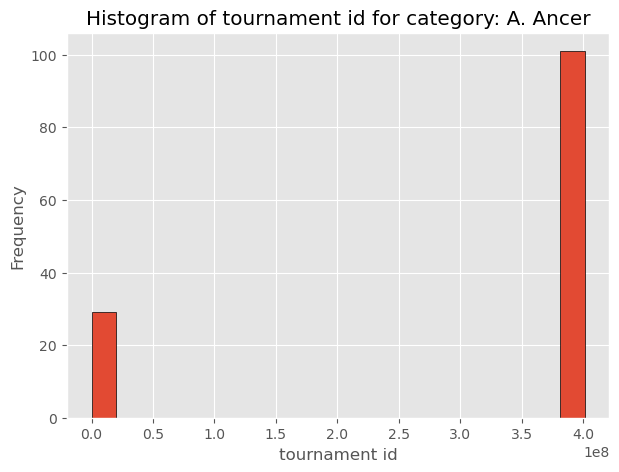

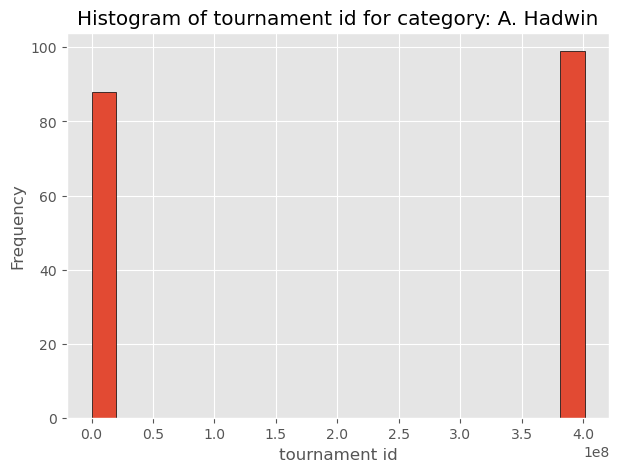

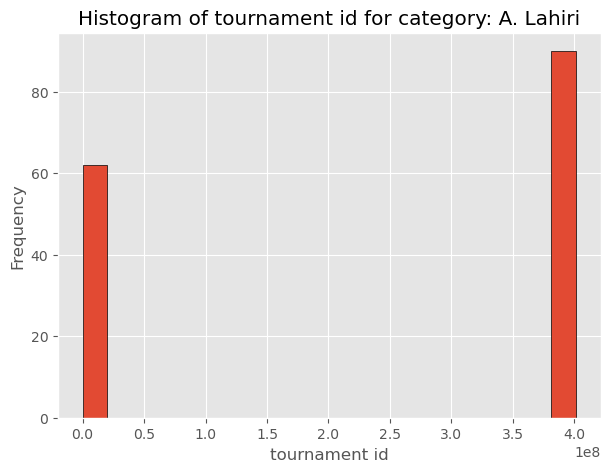

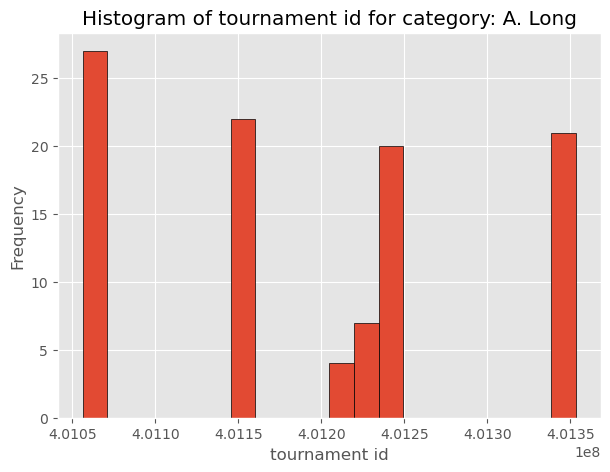

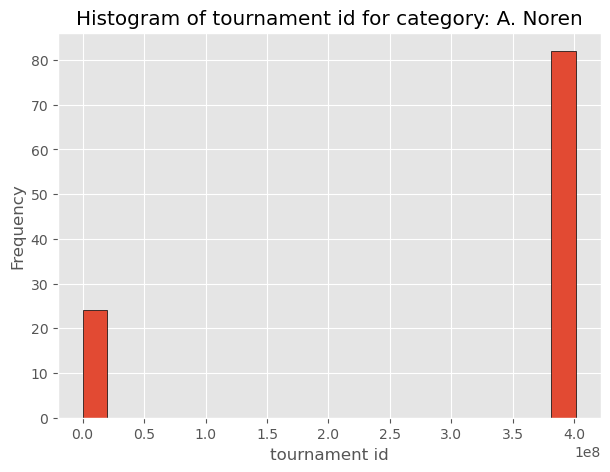

In [24]:
import matplotlib.pyplot as plt

plt.figure(figsize=(7,5))
plt.scatter(df[num_col1], df[num_col2])
plt.xlabel(num_col1)
plt.ylabel(num_col2)
plt.title(f"Scatter Plot of {num_col1} vs {num_col2}")
plt.show()

plt.figure(figsize=(7,5))
plt.hist(df[num_col1], bins=20, edgecolor='black')
plt.xlabel(num_col1)
plt.ylabel("Frequency")
plt.title(f"Histogram of {num_col1}")
plt.show()

plt.figure(figsize=(7,5))
plt.hist(df[num_col2], bins=20, edgecolor='black')
plt.xlabel(num_col2)
plt.ylabel("Frequency")
plt.title(f"Histogram of {num_col2}")
plt.show()

categories = df[cat_col].unique()

categories = categories[:5]

for c in categories:
    subset = df[df[cat_col] == c]

    plt.figure(figsize=(7,5))
    plt.hist(subset[num_col1], bins=20, edgecolor='black')
    plt.xlabel(num_col1)
    plt.ylabel("Frequency")
    plt.title(f"Histogram of {num_col1} for category: {c}")
    plt.show()

In [ ]:
#Write a brief (2-3 paragraphs) report in a Markdown cell regarding your dataset and what
#you observe in your statistics and plots. Did anything surprise you? Were the numeric
#values consistent per individual category, or was there a notable diUerence in the statistics
#or plots? Are there other datasets that you think would provide interesting follow-up
#results?

# The dataset that I choose had to do with golf and the category that I choose was last names, tournament ID, and player ID. 
# The only graph that stood out to me was the Histogram of tournament id for category A. Long, This has more spread out data, 
# versus the rest of the data that have very extreme numbers to the left and thr right of the graphs. 
# I believe that if I had picked another dataset that was more correlated from person to person then the data would have even more meaning. 

# I picked this dataset because I play on the Bellarmine Golf team and these numbers have a lot of meaning to a golfer but might not have
# much meaning if you don't play the game so it is interested to where the numbers lie. It is also very interesting to see all of the stats
# that they keep on different players and what each person think is important. Overall the numeric values were typically consistant from each 
# indivisual category, other than the stand alone A. Long. 